In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

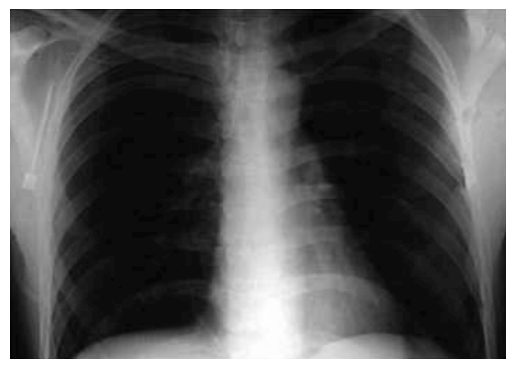

In [9]:
image = cv2.imread('mr.png', cv2.IMREAD_GRAYSCALE)

# show
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

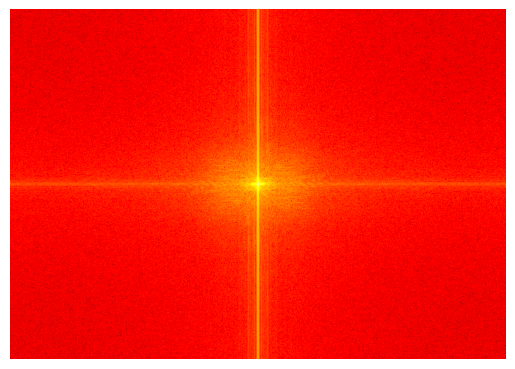

In [5]:
# fourier transform of image
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# show
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()

/tmp/ipykernel_35460/4280370579.py:18: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


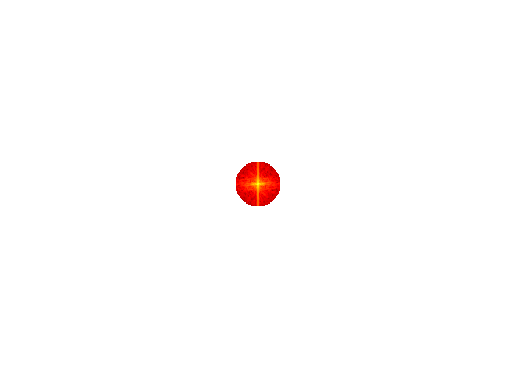

In [8]:
# gussian highpass filter
rows, cols = image.shape
crow, ccol = rows//2, cols//2
# gussian mask
mask = np.zeros((rows, cols), np.uint8)

# create a circle mask
r = 40
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 1

# apply the mask
fshift = fshift * mask

# show the filtered image
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()



/tmp/ipykernel_31189/2975153678.py:11: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


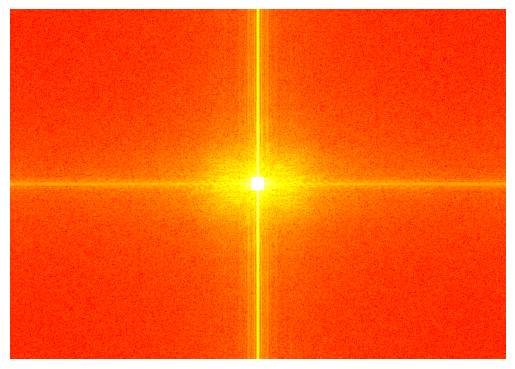

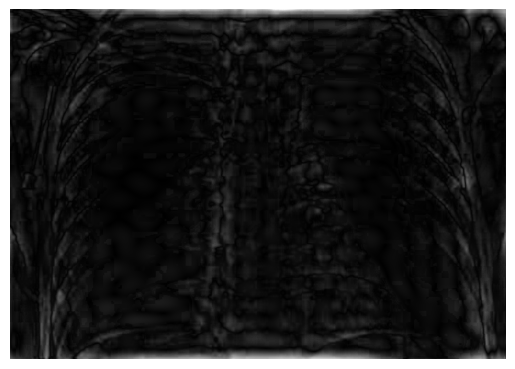

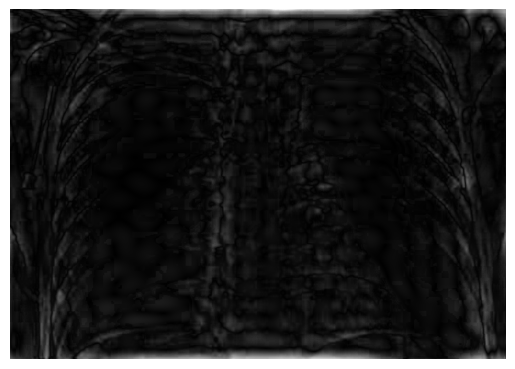

In [73]:
# highpass filter mask
rows, cols = image.shape
crow, ccol = rows//2, cols//2
mask = np.ones((rows, cols), np.uint8)

size = 10
mask[crow-size:crow+size, ccol-size:ccol+size] = 0

# apply mask
fshift = fshift*mask
magnitude_spectrum = 20*np.log(np.abs(fshift))

# show
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()

# inverse fourier transform
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# show
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()

# apply the filter to the original image to achieve better detail
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# show
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()




/tmp/ipykernel_31189/2176045970.py:15: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


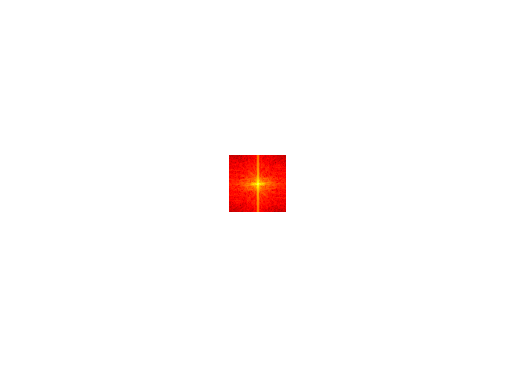

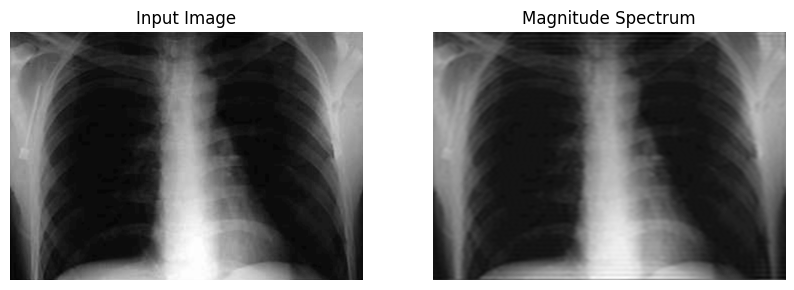

In [47]:
# remove half of the magnitude spectrum
rows, cols = magnitude_spectrum.shape

# Create a mask to zero out the outer circle in the middle
crow, ccol = rows // 2, cols // 2
radius = 50  # Adjust the radius of the circle to be removed

mask = np.zeros((rows, cols), np.uint8)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 1

# apply mask and inverse DFT
fshift = fshift * mask

# show the upadted magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()

# Inverse shift and inverse FFT
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# show the reconstructed image and the original image
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(img_back, cmap='gray')
ax[1].set_title('Magnitude Spectrum')
ax[1].axis('off')
plt.show()



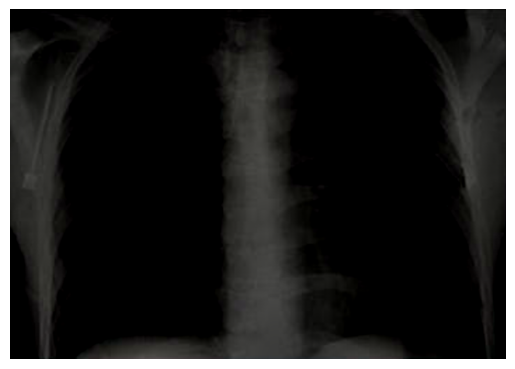

In [10]:
sigma = 100

# 1. create gaussian lowpass filter
def gaussian_lowpass_filter(image, sigma):
    # apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    return blurred

# 2. subtract gaussian lowpass filter from 1 to get highpass filter
def gaussian_highpass_filter(image, sigma):
    # create the Gaussian lowpass filter
    lowpass = gaussian_lowpass_filter(image, sigma)
    
    # subtract the lowpass filter from the original image
    highpass = cv2.subtract(image, lowpass)
    return highpass

# 3. apply filter to image
filtered_image = gaussian_highpass_filter(image, sigma)

# 4. show image
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()
